In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import  metrics  
from sklearn.externals import joblib

C:\Users\no1sv\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [12]:
train = pd.read_csv('../data/train.csv', index_col=0) 

train['location'] = [l.replace('location ', '') for l in train['location']]
train['location'] = train['location'].astype('int')

event_type = pd.read_csv('../data/event_type.csv', index_col=0)
severity_type = pd.read_csv('../data/severity_type.csv', index_col=0)
log_feature = pd.read_csv('../data/log_feature.csv', index_col=0)
resource_type = pd.read_csv('../data/resource_type.csv', index_col=0)

In [13]:
eventTypeVectorized = pd.get_dummies(event_type).groupby(event_type.index).sum()
logFeatureVectorized = pd.get_dummies(log_feature).groupby(log_feature.index).sum()
resourceTypeVectorized = pd.get_dummies(resource_type).groupby(resource_type.index).sum()
severityTypeVectorized = pd.get_dummies(severity_type).groupby(severity_type.index).sum()
mergedTables = eventTypeVectorized.join(severityTypeVectorized).join(logFeatureVectorized).join(resourceTypeVectorized)
df = train.join(mergedTables)
df_1 = df
df.shape

(7381, 457)

In [14]:
# df_X = df_X.append(df[df['fault_severity']!=0])
# df_X = df_X.append(df[df['fault_severity']==2])
# mergedTables = df_X
df_1.info()
print(df_1.shape)
#df_X['volume'] = volume_norm
df_1.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7381 entries, 14121 to 17067
Columns: 457 entries, location to resource_type_resource_type 9
dtypes: int32(1), int64(2), uint8(454)
memory usage: 3.7 MB
(7381, 457)


,location,fault_severity,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,...,resource_type_resource_type 1,resource_type_resource_type 10,resource_type_resource_type 2,resource_type_resource_type 3,resource_type_resource_type 4,resource_type_resource_type 5,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9
id,,,,,,,,,,,,,,,,,,,,,
14121,118,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9320,91,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14394,152,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8218,931,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14804,120,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
X = df_1.drop('fault_severity',1)
y = df_1['fault_severity']

# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=88)
# X, y = ros.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Khởi tạo
decision_tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
# max_depth: độ sâu tối đa của cây
#decision_tree = RandomForestClassifier(n_estimators=2000)
#Huấn luyện
#rdf.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
y_pred = decision_tree.predict(X_test)
#y_pred = rdf.predict(X_test)

report = metrics.classification_report(y_test,y_pred,digits=4) 
#print(accuracy_score(pd.DataFrame(decision_tree.predict(y_test,y_pred))
print (report)

matrix = metrics.confusion_matrix(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0     0.8027    0.8168    0.8097      1430
           1     0.5291    0.4991    0.5137       565
           2     0.4978    0.5136    0.5056       220

    accuracy                         0.7056      2215
   macro avg     0.6099    0.6098    0.6097      2215
weighted avg     0.7027    0.7056    0.7040      2215

[[1168  206   56]
 [ 225  282   58]
 [  62   45  113]]


In [21]:
df = df.append(df[df['fault_severity']!=0])
df = df.append(df[df['fault_severity']==2])

X = df.drop('fault_severity',1)
y = df['fault_severity']

print(df.shape)
print(X.shape)
print(y.shape)
#Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(11430, 457)
(11430, 456)
(11430,)


In [22]:
# Khởi tạo
decision_tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
# max_depth: độ sâu tối đa của cây
#decision_tree = RandomForestClassifier(n_estimators=2000)
#Huấn luyện
#rdf.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
y_pred = decision_tree.predict(X_test)
#y_pred = rdf.predict(X_test)

report = metrics.classification_report(y_test,y_pred,digits=4) 
#print(accuracy_score(pd.DataFrame(decision_tree.predict(y_test,y_pred))
print (report)

matrix = metrics.confusion_matrix(y_test,y_pred)
print(matrix)


              precision    recall  f1-score   support

           0     0.8881    0.7831    0.8323      1429
           1     0.7851    0.8355    0.8095      1137
           2     0.8749    0.9722    0.9210       863

    accuracy                         0.8481      3429
   macro avg     0.8494    0.8636    0.8543      3429
weighted avg     0.8506    0.8481    0.8471      3429

[[1119  243   67]
 [ 134  950   53]
 [   7   17  839]]


In [27]:
#import graphviz
#from sklearn import tree

#feature_names = X_test.columns
#class_name = ['0','1', '2']

#dot_data=tree.export_graphviz(decision_tree,max_depth=5,out_file=None,filled= True,rounded=True, feature_names=feature_names, node_ids=True,leaves_parallel=True, class_names=class_name)
#graph= graphviz.Source(dot_data) 
#graph.render("Tree.pdf")

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_auc=roc_auc_score(y_test,decision_tree.predict_proba(X_test), multi_class="ovr")
print(y_auc)

0.9057027422960052


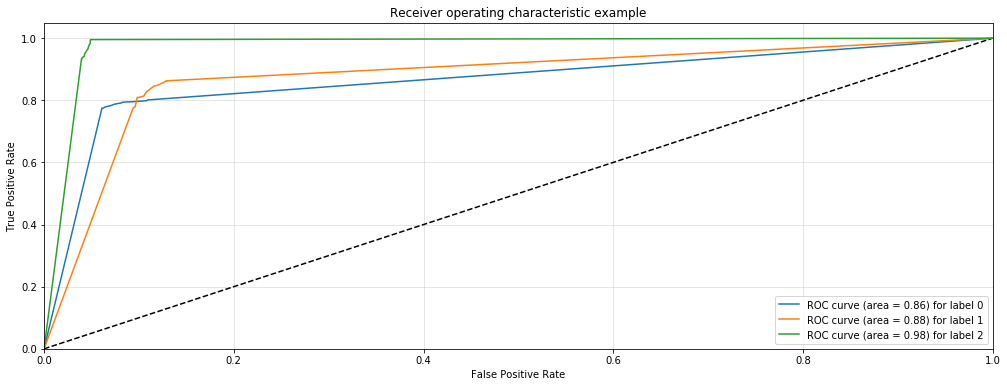

In [26]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.show()

plot_multiclass_roc(decision_tree, X_test, y_test, n_classes=3)

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
num_folds = 10
scoring = ['precision_macro', 'recall_macro']
model = DecisionTreeClassifier(max_depth=30)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#model = LinearRegression()
results = cross_val_score(model, X, y, cv=cv)
scores = cross_validate(model, X, y, scoring=scoring)

In [33]:
print(results)
scores['test_precision_macro']

[0.85156022 0.8407699  0.84164479 0.83960338 0.83552056]


array([0.89925078, 0.89816844, 0.90639268, 0.89618751, 0.90134296])

In [ ]:
# model = RandomForestClassifier(n_estimators= 2000, random_state= 10, max_depth=30)
# model.fit(X_train, y_train)

In [ ]:
# y_pred = model.predict(X_test)
# #y_pred = rdf.predict(X_test)

# report = metrics.classification_report(y_test,y_pred,digits=4) 
# #print(accuracy_score(pd.DataFrame(decision_tree.predict(y_test,y_pred))
# print (report)

# matrix = metrics.confusion_matrix(y_test,y_pred)
# print(matrix)

# features = df_1.columns
# importances = model.feature_importances_
# indices = np.argsort(importances)
# print(indices)
# plt.figure(figsize=(12,100))
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')

In [ ]:
# from sklearn.externals import joblib


# joblib.dump(decision_tree, '../model/decision_tree_model.joblib')

# decision_tree = joblib.load('../model/decision_tree_model.joblib')

In [ ]:
def onehot(predict_data):
    eventTypeVectorized = pd.get_dummies(event_type).groupby(event_type.index).sum()
    logFeatureVectorized = pd.get_dummies(log_feature).groupby(log_feature.index).sum()
    resourceTypeVectorized = pd.get_dummies(resource_type).groupby(resource_type.index).sum()
    severityTypeVectorized = pd.get_dummies(severity_type).groupby(severity_type.index).sum()
    mergedTables = eventTypeVectorized.join(severityTypeVectorized).join(logFeatureVectorized).join(resourceTypeVectorized)
    df = predict_data.join(eventTypeVectorized).join(severityTypeVectorized).join(logFeatureVectorized).join(resourceTypeVectorized)
    return df

def predict_disruption(predict_data):
    decision_tree = joblib.load('decision_tree_model.joblib')
    data =predict_data
    predict_data['location'] = [l.replace('location ', '') for l in predict_data['location']]
    predict_data['location'] = predict_data['location'].astype('int')
    predict_data = onehot(predict_data)
    print(predict_data)
    predict = decision_tree.predict(predict_data)
    pred = pd.DataFrame(predict, columns = ['predict_disruptions'])
    a = data.index
    pred = pred.set_index(a)
    submission = pd.concat([data, pred], axis =1)
    return submission

In [ ]:
data = pd.read_csv('../data/test1.csv', index_col=0)
submission = predict_disruption(data)
print(submission)